<a href="https://colab.research.google.com/github/MatisseAD/MatisseAD-Website/blob/main/TP02_Notebook_ELEVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP - Mesures et incertitudes : mesures d'une résistance

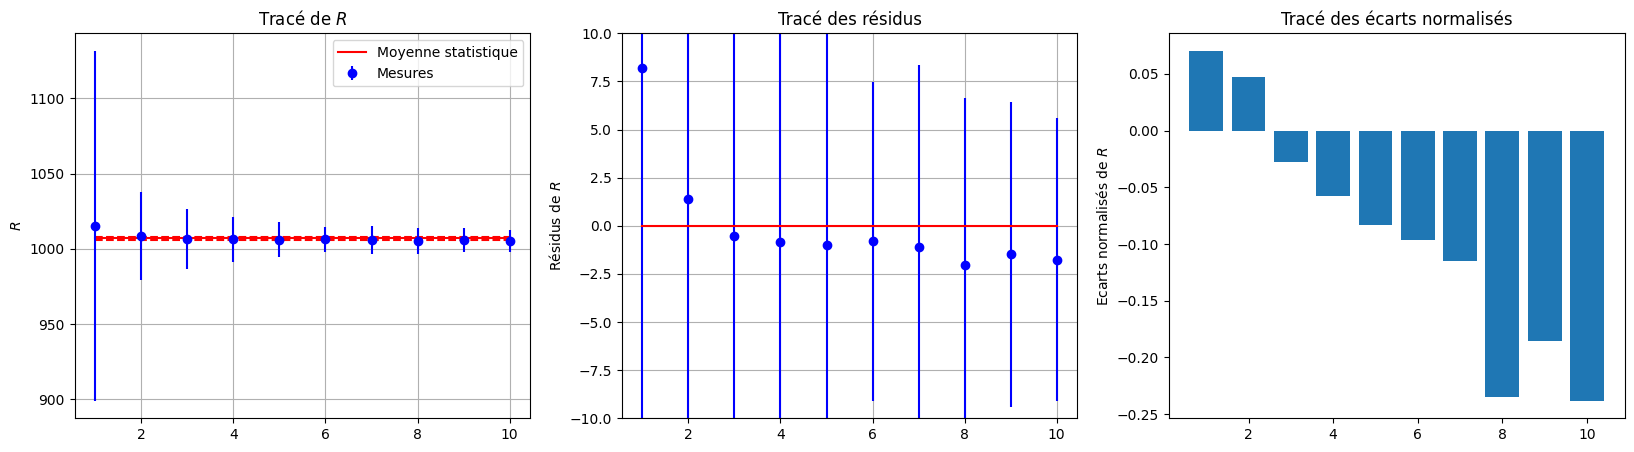

In [12]:
#----------------------------------------------
## Importation des bibliothèques utiles
#----------------------------------------------

## On importe la bibliothèque de fonctions "numpy" que l'on renomme np : https://numpy.org/doc/stable/
import numpy as np

## On importe la bibliothèque de fonctions "matplotlib.pyplot" que l'on renomme plt : https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

## On efface toutes les figures pour ne pas saturer la mémoire
plt.close('all')


#----------------------------------------------
## Données expérimentales à compléter
#----------------------------------------------
# Tensions U aux bornes de la résistance :
U = np.array([0.528, 2.229, 3.483, 4.921, 6.641, 7.246, 9.065, 10.544, 11.787, 13.332])

# Intensités I du courant traversant la résistance :
I = np.array([5.2e-4, 2.21e-3, 3.46e-3, 4.89e-3, 6.6e-3, 7.2e-3, 9.01e-3, 10.49e-3, 11.72e-3, 13.26e-3])


# Incertitudes-types sur les données : attention, il faut CHOISIR la méthode !
# -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
# Pour la tension
    # Pourcentage des données
#u_U = U * 3/100
    # Une valeur identique pour tous de même unité que U
# u_U = np.ones(np.size(U))*5*1e-4
    # Différentes valeurs de même unité que U
u_U = np.array([6.1e-3,7.1e-3,7.8e-3,8.6e-3,9.6e-3,1e-2,1.1e-2,1.19e-2,1.26e-2,1.35e-2])

# -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
# Pour l'intensité du courant :
    # Pourcentage des données
#u_I = I * 3/100
    # Une valeur identique pour tous de même unité que I
# u_I = np.ones(np.size(I))*1*1e-1
    # Différentes valeurs de même unité que I
u_I = np.array([5.9236e-5,6.4115e-5,6.7723e-5,7.1851e-5,7.6788e-5,5.852e-5,8.3745e-5,8.97e-5,9.1568e-5,9.6013e-5])




#----------------------------------------------
## Traitement des mesures
#----------------------------------------------
# On calcule les valeurs de la résistance associée à chaque couple (U,I)...
R = U/I
# ... puis l'incertitude associée à chaque valeur
u_R = R*np.sqrt((u_U/U)**2 + (u_I/I)**2)

Rmoy = np.mean(R)
u_Rmoy_A = np.std(R,ddof=1)/np.sqrt(np.size(R)) # le nombre de degre de liberté (ddof) est diminué de 1 car le calcul de l'écart-type estime la moyenne à l'aide du même jeu de données : il y a donc une équation indépendante en moins.

# On calcule les résidus
Rres = R - Rmoy

#----------------------------------------------
## Tracés
#----------------------------------------------
Xdata = np.arange(np.size(R))+1

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.plot(Xdata, Rmoy*np.ones(np.size(Xdata)), 'r', label='Moyenne statistique')
plt.plot(Xdata, (Rmoy - u_Rmoy_A)*np.ones(np.size(Xdata)), 'r--')
plt.plot(Xdata, (Rmoy + u_Rmoy_A)*np.ones(np.size(Xdata)), 'r--')
plt.errorbar(Xdata,R,yerr=u_R,fmt='bo',zorder=2,label='Mesures') # Attention à bien tracer les incertitudes-type
plt.legend()
plt.grid('on')
plt.ylabel(r'$R$')
plt.title(r"Tracé de $R$")

plt.subplot(1,3,2)
plt.errorbar(Xdata,Rres,yerr=u_R,fmt='bo',zorder=2)
plt.plot(Xdata,0*Xdata,'r')
plt.grid('on')
plt.ylabel(r'Résidus de $R$')
plt.title(r"Tracé des résidus")
plt.ylim(-10,10)

plt.subplot(1,3,3)
plt.bar(Xdata,Rres/np.sqrt(u_R**2 + u_Rmoy_A**2))
plt.ylabel(r'Ecarts normalisés de $R$')
plt.title(r"Tracé des écarts normalisés")
plt.show()

In [9]:
import math
import numpy as np

tension=[0.528, 2.229, 3.483, 4.921, 6.641, 7.246, 9.065, 10.544, 11.787, 13.332]
incertitude_tension=[]

courant=[5.2e-4, 2.21e-3, 3.46e-3, 4.89e-3, 6.6e-3, 7.2e-3, 9.01e-3, 10.49e-3, 11.72e-3, 13.26e-3]
incertitude_courant=[]


n=len(tension)

print("Valeurs de u(U)")

for i in range(n):
  incertitude_tension.append((0.1e-2*tension[i]+10e-3)/math.sqrt(3))
  print(f"u(U[{i}]): {incertitude_tension[i]:.4f}")

print("\nValeurs de u(I)")

for i in range(n):
  incertitude_courant.append((0.5e-2*courant[i]+5*2e-5)/math.sqrt(3))
  print(f"u(I[{i}]): {incertitude_courant[i]:.4e}")

print("\nValeurs de R")
resistance = []
incertitude_resistance = []

for i in range(n):
  r_val = tension[i] / courant[i]
  resistance.append(r_val)

  u_r_val = r_val * math.sqrt((incertitude_tension[i]/tension[i])**2 + (incertitude_courant[i]/courant[i])**2)
  incertitude_resistance.append(u_r_val)

  print(f"R[{i}]: {resistance[i]:.2f} +/- {incertitude_resistance[i]:.2f}")


print("\n Moyenne des résistances")

Rmoy = np.mean(resistance)
print(f"Rmoy: {Rmoy:.2f}")

Valeurs de u(U)
u(U[0]): 0.0061
u(U[1]): 0.0071
u(U[2]): 0.0078
u(U[3]): 0.0086
u(U[4]): 0.0096
u(U[5]): 0.0100
u(U[6]): 0.0110
u(U[7]): 0.0119
u(U[8]): 0.0126
u(U[9]): 0.0135

Valeurs de u(I)
u(I[0]): 5.9236e-05
u(I[1]): 6.4115e-05
u(I[2]): 6.7723e-05
u(I[3]): 7.1851e-05
u(I[4]): 7.6788e-05
u(I[5]): 7.8520e-05
u(I[6]): 8.3745e-05
u(I[7]): 8.8017e-05
u(I[8]): 9.1568e-05
u(I[9]): 9.6013e-05

Valeurs de R
R[0]: 1015.38 +/- 116.26
R[1]: 1008.60 +/- 29.43
R[2]: 1006.65 +/- 19.83
R[3]: 1006.34 +/- 14.89
R[4]: 1006.21 +/- 11.80
R[5]: 1006.39 +/- 11.06
R[6]: 1006.10 +/- 9.43
R[7]: 1005.15 +/- 8.51
R[8]: 1005.72 +/- 7.93
R[9]: 1005.43 +/- 7.35

 Moyenne des résistances
Rmoy: 1007.20
